In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# First Model
# X = resources, probabilities (scale of 0-5 [D=0, 2,12 = 1, 3,11 = 2, 4,10 = 3, 5,9 = 4, 6,8 = 5])
# y = points

In [3]:
# CSV - modified to rename columns
data = pd.read_csv('resources/data_modified.csv')

# Remove un-needed columns
data = data.drop(columns=['gameNum','player','points','me','2','3','4','5','6','7','8','9','10','11','12',\
                          'production','tradeGain','robberCardsGain','totalGain','tradeLoss',\
                          'robberCardsLoss','tribute','totalLoss','totalAvailable',
                         '1_1_N','1_2_N','1_3_N','2_1_N','2_2_N','2_3_N'])

data



,win,1_1_P,1_1_R,1_2_P,1_2_R,1_3_P,1_3_R,2_1_P,2_1_R,2_2_P,2_2_R,2_3_P,2_3_R
0,0,5,L,2,C,2,C,4,L,3,W,2,O
1,0,4,W,5,O,3,W,3,L,4,S,2,O
2,1,4,S,5,S,1,W,5,O,3,S,2,C
3,0,5,O,4,L,2,L,3,L,5,L,3,S
4,1,5,W,4,O,3,O,5,W,3,L,0,2L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,5,S,3,W,2,O,3,L,4,C,2,S
196,0,5,O,4,W,3,L,4,C,5,O,2,C
197,1,5,L,3,C,2,W,3,S,4,O,2,C
198,0,4,C,5,L,3,L,4,S,4,O,1,S


In [4]:
# Pandas dummies convert to categorical
data = pd.get_dummies(data)

# Create list of column names
columns = []
for ea in data.columns:
    columns.append(ea)
# Pop 0th
columns.pop(0)
data

,win,1_1_P,1_2_P,1_3_P,2_1_P,2_2_P,2_3_P,1_1_R_C,1_1_R_L,1_1_R_O,...,2_3_R_2S,2_3_R_2W,2_3_R_3G,2_3_R_B,2_3_R_C,2_3_R_D,2_3_R_L,2_3_R_O,2_3_R_S,2_3_R_W
0,0,5,2,2,4,3,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,4,5,3,3,4,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,4,5,1,5,3,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,5,4,2,3,5,3,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,5,4,3,5,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,5,3,2,3,4,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
196,0,5,4,3,4,5,2,0,0,1,...,0,0,0,0,1,0,0,0,0,0
197,1,5,3,2,3,4,2,0,1,0,...,0,0,0,0,1,0,0,0,0,0
198,0,4,5,3,4,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


(200, 50) (200, 1)


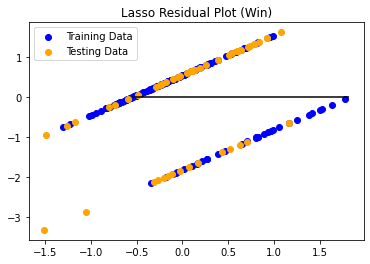

In [5]:
# Assign X (data) and y (target)
X = data[columns]
y = data['win'].values.reshape(-1,1)
print(X.shape, y.shape)

# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Lasso Residual Plot (Win)")
plt.savefig("html/static/images/lasso_residual_win.png")
plt.show()
### END SOLUTION


In [6]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.697375042753005, R2: -0.4459120734562636


In [7]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.5358816596894118, R2: -0.3083436360317213


In [8]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.5358816596894118, R2: -0.3083436360317213


In [9]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.5870901938965347, R2: -0.35196572072667776


In [10]:
#######################################################

In [11]:
# Second Model
# X = resources-probabilities (combined) (scale of 0-5 [D=0, 2,12 = 1, 3,11 = 2, 4,10 = 3, 5,9 = 4, 6,8 = 5])
# y = points

In [12]:
# CSV - modified to rename columns
data = pd.read_csv('resources/data_modified.csv')



In [13]:
# Remove un-needed columns
data = data.drop(columns=['gameNum','player','points','me','2','3','4','5','6','7','8','9','10','11','12',\
                          'production','tradeGain','robberCardsGain','totalGain','tradeLoss',\
                          'robberCardsLoss','tribute','totalLoss','totalAvailable',
                         '1_1_N','1_2_N','1_3_N','2_1_N','2_2_N','2_3_N'])

In [14]:
# Combine resource & probability
data['1_1_PR'] = data['1_1_R']+data['1_1_P'].astype(str)
data['1_2_PR'] = data['1_2_R']+data['1_2_P'].astype(str)
data['1_3_PR'] = data['1_3_R']+data['1_3_P'].astype(str)
data['2_1_PR'] = data['2_1_R']+data['2_1_P'].astype(str)
data['2_2_PR'] = data['2_2_R']+data['2_2_P'].astype(str)
data['2_3_PR'] = data['2_3_R']+data['2_3_P'].astype(str)

In [15]:
# drop resouce and probaility columns
data = data.drop(columns=['1_1_P', '1_1_R', '1_2_P', '1_2_R', '1_3_P', '1_3_R', '2_1_P',
       '2_1_R', '2_2_P', '2_2_R', '2_3_P', '2_3_R'])

In [16]:
# Pandas dummies convert to categorical
data = pd.get_dummies(data)

# Create list of column names
columns = []
for ea in data.columns:
    columns.append(ea)
# Pop 0th
columns.pop(0)

'win'

In [17]:
data

,win,1_1_PR_C3,1_1_PR_C4,1_1_PR_C5,1_1_PR_L3,1_1_PR_L4,1_1_PR_L5,1_1_PR_O3,1_1_PR_O4,1_1_PR_O5,...,2_3_PR_O2,2_3_PR_O3,2_3_PR_O4,2_3_PR_S1,2_3_PR_S2,2_3_PR_S3,2_3_PR_W1,2_3_PR_W2,2_3_PR_W3,2_3_PR_W4
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
197,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


(200, 130) (200, 1)


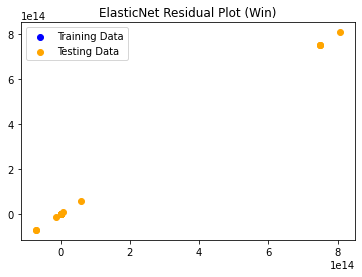

In [18]:
# Assign X (data) and y (target)
X = data[columns]
y = data['win'].values.reshape(-1,1)
print(X.shape, y.shape)

# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("ElasticNet Residual Plot (Win)")
plt.savefig("html/static/images/elastic_residual_win.png")
plt.show()
### END SOLUTION



In [23]:

# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 4.7014812016414864e+28, R2: -4.004965468064971e+28
